In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("inception_n.csv")

In [2]:
df.columns

Index(['activation', 'aux1_accuracy', 'aux1_loss', 'aux2_accuracy',
       'aux2_loss', 'dataset', 'dropout_rate', 'epochs', 'input_dims', 'loss',
       'lr_rate', 'main_accuracy', 'main_loss', 'model_name', 'test_accuracy',
       'test_loss', 'val_aux1_accuracy', 'val_aux1_loss', 'val_aux2_accuracy',
       'val_aux2_loss', 'val_loss', 'val_main_accuracy', 'val_main_loss',
       'opt'],
      dtype='object')

In [3]:
def literal_return(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val

In [4]:
for col in list(df.columns):
    df[col] = df.apply(lambda x: literal_return(str(x[col])),axis=1)

In [5]:
# df[0:3][:,J]
d_opt = df[['main_accuracy','val_main_accuracy','loss','opt','test_accuracy']][0:6]
d_opt

,main_accuracy,val_main_accuracy,loss,opt,test_accuracy
0,"[0.80731344, 0.9772637, 0.9834826, 0.988607, 0...","[0.87580806016922, 0.7410101294517517, 0.96974...","[1.6078689948006055, 0.2451490221450578, 0.177...",sgd,0.9600
1,"[0.8104975, 0.97537315, 0.9788806, 0.9870398, ...","[0.9563131332397461, 0.9661616086959839, 0.980...","[1.447963404519048, 0.250147792361862, 0.22745...",adam,0.9874
2,"[0.80634326, 0.9706219, 0.9814179, 0.98544776,...","[0.9034343361854553, 0.95252525806427, 0.97202...","[1.56470524057227, 0.29654361480504127, 0.2005...",adagrad,0.9859
3,"[0.25155222, 0.4315224, 0.50325376, 0.5520597,...","[0.22963635623455048, 0.46515151858329773, 0.4...","[5.855830362519222, 4.678803367728618, 4.15245...",sgd,0.6306
4,"[0.24068657, 0.40020895, 0.49325374, 0.5469851...","[0.3187878727912903, 0.40090909600257874, 0.40...","[5.79272524728348, 4.6710144616881415, 4.09117...",adam,0.6440
5,"[0.28922388, 0.4237612, 0.47519404, 0.51044774...","[0.3824242353439331, 0.4492727220058441, 0.494...","[5.666933932517892, 4.686836285263745, 4.32059...",adagrad,0.5795


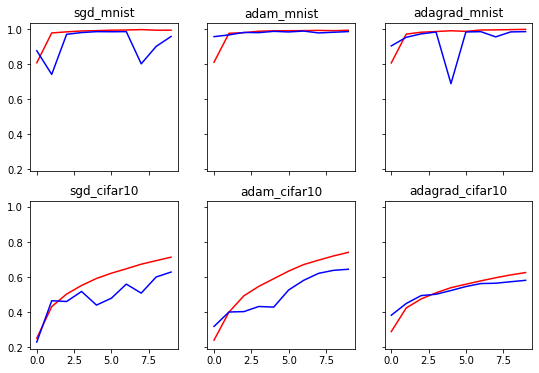

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(9,6))
ax1.set_title('sgd_mnist')
ax1.plot(d_opt['main_accuracy'][0] ,'r')
ax1.plot(d_opt['val_main_accuracy'][0] ,'b')
# ax1.plot(d_opt['loss'][0], 'g' )

ax2.set_title('adam_mnist')
ax2.plot(d_opt['main_accuracy'][1],'r', label="adam_acc")
ax2.plot(d_opt['val_main_accuracy'][1] ,'b')
# ax2.plot(d_opt['loss'][1] ,'g')

ax3.set_title('adagrad_mnist')
ax3.plot(d_opt['main_accuracy'][2] , 'r')
ax3.plot(d_opt['val_main_accuracy'][2] ,'b')
# ax3.plot(d_opt['loss'][2] ,'g')

ax4.set_title('sgd_cifar10')
ax4.plot(d_opt['main_accuracy'][3] ,'r')
ax4.plot(d_opt['val_main_accuracy'][3] ,'b')
# ax4.plot(d_opt['loss'][3] ,'g')

ax5.set_title('adam_cifar10')
ax5.plot(d_opt['main_accuracy'][4] ,'r')
ax5.plot(d_opt['val_main_accuracy'][4] ,'b')
# ax5.plot(d_opt['loss'][4] ,'g')

ax6.set_title('adagrad_cifar10')
ax6.plot(d_opt['main_accuracy'][5] ,'r')
ax6.plot(d_opt['val_main_accuracy'][5] ,'b')
# ax6.plot(d_opt['loss'][5] ,'g')
plt.show()

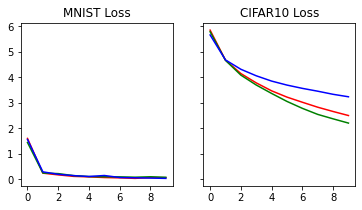

In [7]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(6,3))
ax1.set_title('MNIST Loss')
ax1.plot(d_opt['loss'][0],'r' ,label="sgd_val_acc")
ax1.plot(d_opt['loss'][1],'g' ,label="adam_val_acc")
ax1.plot(d_opt['loss'][2],'b' ,label="adagrad_val_acc")
ax2.set_title('CIFAR10 Loss')
ax2.plot(d_opt['loss'][3],'r' ,label="sgd_val_acc")
ax2.plot(d_opt['loss'][4],'g' ,label="adam_val_acc")
ax2.plot(d_opt['loss'][5],'b' ,label="adagrad_val_acc")
plt.show()

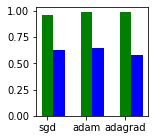

In [8]:
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True,figsize=(2,2))
width = 0.3
ind= np.arange(len(d_opt[['opt']])/2)
ax1.bar(ind, list(d_opt['test_accuracy'].values)[0:3],width,color='g')
ax1.bar(ind + width, list(d_opt['test_accuracy'].values)[3:6],width,color='b')
ax1.set_xticks(ind)
ax1.set_xticklabels(list(d_opt['opt'].values))
plt.show()

,opt,dataset,lr_rate,test_accuracy
9,sgd,mnist,0.0001,0.9842
0,sgd,mnist,0.0010,0.9600
6,sgd,mnist,0.0100,0.9159
7,sgd,mnist,0.1000,0.1032
8,sgd,mnist,0.5000,0.1032


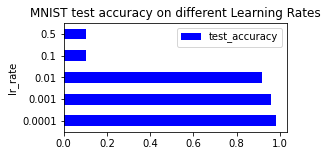

In [9]:
frames = [df[['opt','dataset','lr_rate','test_accuracy']][0:1],df[['opt','dataset','lr_rate','test_accuracy']][6:10]]
df_lr_rate = pd.concat(frames,ignore_index=False)#.reset_index(drop=True)
df_lr_rate = df_lr_rate.sort_values(by=['lr_rate'])
ax = df_lr_rate.plot.barh(x='lr_rate', y='test_accuracy',figsize=(4,2),color='b',title='MNIST test accuracy on different Learning Rates')
df_lr_rate

,opt,dataset,activation,test_accuracy
11,sgd,mnist,tanh,0.0980
10,sgd,mnist,relu,0.1135
12,sgd,mnist,sigmoid,0.9257
0,sgd,mnist,softmax,0.9600


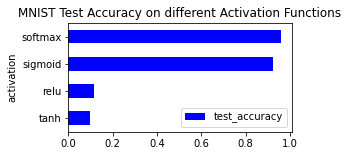

In [10]:
frames = [df[['opt','dataset','activation','test_accuracy']][0:1],df[['opt','dataset','activation','test_accuracy']][10:13]]
d_act_rate = pd.concat(frames,ignore_index=False)#.reset_index(drop=True)
d_act_rate = d_act_rate.sort_values(by=['test_accuracy'])
ax = d_act_rate.plot.barh(x='activation', y='test_accuracy',figsize=(4,2),color='b',title='MNIST Test Accuracy on different Activation Functions')
d_act_rate

,opt,dataset,dropout_rate,test_accuracy
15,sgd,mnist,0.1,0.9884
0,sgd,mnist,0.2,0.9600
14,sgd,mnist,0.5,0.9852
13,sgd,mnist,0.9,0.0980


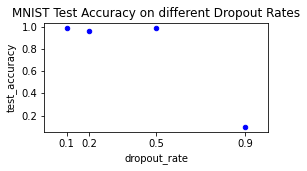

In [11]:
frames = [df[['opt','dataset','dropout_rate','test_accuracy']][0:1],df[['opt','dataset','dropout_rate','test_accuracy']][13:16]]
d_drp_rate = pd.concat(frames,ignore_index=False)#.reset_index(drop=True)
d_drp_rate = d_drp_rate.sort_values(by=['dropout_rate'])
list(d_drp_rate['dropout_rate'].values)
ax = d_drp_rate.plot.scatter(x='dropout_rate', y='test_accuracy',figsize=(4,2),color='b',xticks=list(d_drp_rate['dropout_rate'].values),xlim=[0,1],title='MNIST Test Accuracy on different Dropout Rates')
d_drp_rate

In [12]:
vector_cols = ['aux1_accuracy', 'aux1_loss', 'aux2_accuracy',
       'aux2_loss', 'main_accuracy', 'main_loss', 'loss',
         'val_aux1_accuracy', 'val_aux1_loss', 'val_aux2_accuracy',
       'val_aux2_loss', 'val_loss', 'val_main_accuracy', 'val_main_loss']

In [13]:
for col in vector_cols:
    df[col] = df.apply(lambda x: x[col][-1],axis=1)

In [14]:
df[['model_name','activation','dataset','dropout_rate','epochs','input_dims','lr_rate','opt','main_accuracy','val_main_accuracy','loss','test_accuracy','test_loss']]

,model_name,activation,dataset,dropout_rate,epochs,input_dims,lr_rate,opt,main_accuracy,val_main_accuracy,loss,test_accuracy,test_loss
0,inception,softmax,mnist,0.2,10.0,"(224, 224, 3)",0.0010,sgd,0.993060,0.957121,0.067948,0.9600,0.408434
1,inception,softmax,mnist,0.2,10.0,"(224, 224, 3)",0.0010,adam,0.992512,0.985000,0.082657,0.9874,0.172555
2,inception,softmax,mnist,0.2,10.0,"(224, 224, 3)",0.0010,adagrad,0.997637,0.984848,0.039962,0.9859,0.130673
3,inception,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.0010,sgd,0.713463,0.628545,2.505806,0.6306,3.394365
4,inception,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.0010,adam,0.740657,0.644485,2.209393,0.6440,3.209218
5,inception,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.0010,adagrad,0.625672,0.581394,3.241262,0.5795,3.547598
6,inception,softmax,mnist,0.2,10.0,"(224, 224, 3)",0.0100,sgd,0.981294,0.899343,0.198402,0.9159,0.651437
7,inception,softmax,mnist,0.2,10.0,"(224, 224, 3)",0.1000,sgd,0.105050,0.098030,43.033309,0.1032,43.032091
8,inception,softmax,mnist,0.2,10.0,"(224, 224, 3)",0.5000,sgd,0.099925,0.098030,43.679637,0.1032,43.683261
9,inception,softmax,mnist,0.2,10.0,"(224, 224, 3)",0.0001,sgd,0.987612,0.982273,0.144570,0.9842,0.152705
